## Лабораторна робота №1 
### Варіант №3

### Тема: Дослідження та візуалізація даних за допомогою Python

### Мета: отримати базові навики використання Python для дослідження та візуалізації даних.


1. Створіть функцію, яка приймає назву файлу та назву стовпця як 
параметр та повертає масив numpy зі значеннями стовпця.

In [16]:
import numpy as np
import csv
import matplotlib.pyplot as plt

def extract_column_as_nparr(file, column):
    with open(file, 'r') as file:
        csvr = csv.reader(file)
        header = next(csvr)
        
        if column not in header:
            raise ValueError(f"'{column}' стовпець не знайдено")
        col_index = header.index(column)
        
        column_data = []
        for row in csvr:
            column_data.append(row[col_index])
            
    return np.array(column_data)

2. Використовуючи функцію з попереднього завдання, створіть масив 
numpy зі значень стовпця «APC» (Armored personnel carrier).

In [17]:
file = r"C:\Users\Dell\Desktop\course 3\од\russia_losses_equipment.csv"
column = "APC"
result_array = extract_column_as_nparr(file, column)[::-1]
result_array

array(['516', '706', '706', '816', '846', '862', '900', '939', '945',
       '985', '999', '1036', '1070', '1105', '1165', '1205', '1226',
       '1249', '1279', '1375', '1435', '1448', '1470', '1487', '1535',
       '1556', '1578', '1597', '1625', '1640', '1664', '1694', '1710',
       '1723', '1735', '1751', '1776', '1830', '1844', '1858', '1861',
       '1891', '1891', '1895', '1911', '1923', '1946', '1964', '1968',
       '1976', '1982', '2002', '2041', '2063', '2087', '2118', '2162',
       '2205', '2238', '2258', '2308', '2342', '2389', '2418', '2445',
       '2471', '2519', '2567', '2610', '2651', '2686', '2713', '2741',
       '2764', '2808', '2856', '2873', '2900', '2934', '2958', '2974',
       '3009', '3043', '3063', '3090', '3116', '3141', '3166', '3194',
       '3213', '3235', '3246', '3258', '3270', '3282', '3302', '3343',
       '3354', '3366', '3379', '3392', '3400', '3416', '3429', '3438',
       '3450', '3466', '3484', '3492', '3503', '3528', '3545', '3563',
       '3

3. Знайдіть добові втрати БТР.

In [18]:
daily_losses = np.diff(result_array.astype(int))
daily_losses

array([190,   0, 110,  30,  16,  38,  39,   6,  40,  14,  37,  34,  35,
        60,  40,  21,  23,  30,  96,  60,  13,  22,  17,  48,  21,  22,
        19,  28,  15,  24,  30,  16,  13,  12,  16,  25,  54,  14,  14,
         3,  30,   0,   4,  16,  12,  23,  18,   4,   8,   6,  20,  39,
        22,  24,  31,  44,  43,  33,  20,  50,  34,  47,  29,  27,  26,
        48,  48,  43,  41,  35,  27,  28,  23,  44,  48,  17,  27,  34,
        24,  16,  35,  34,  20,  27,  26,  25,  25,  28,  19,  22,  11,
        12,  12,  12,  20,  41,  11,  12,  13,  13,   8,  16,  13,   9,
        12,  16,  18,   8,  11,  25,  17,  18,  10,   4,  11,  18,   8,
        18,   5,   8,  14,  28,  17,  16,   6,  10,   1,   7,   0,  28,
        17,   8,  14,   4,   8,   5,   1,   3,   0,  34,   8,   5,   7,
         6,  13,   7,   8,   9,  13,   8,   9,  12,   8,   8,   8,   9,
         7,   3,   8,   4,   6,  19,   4,  15,   6,  10,  14,   8,   7,
        11,  15,  11,  10,  17,  16,  17,  12,   6,   8,   5,   

4. 5 найбільших добових втрат БТР

In [19]:
top_5_losses = np.sort(daily_losses)[-5:][::-1]
top_5_losses

array([190, 120, 110,  96,  91])

5.  Cкільки БТР було знищено влітку 2023 року

In [20]:
summer, autumn = 151, 243  
summer_destructions = result_array[autumn].astype(int) - result_array[summer - 1].astype(int)
summer_destructions

np.int64(1401)

6.  Графік втрат БТР за останні 200 днів (починаючи з останньої 
дати в наборі даних)

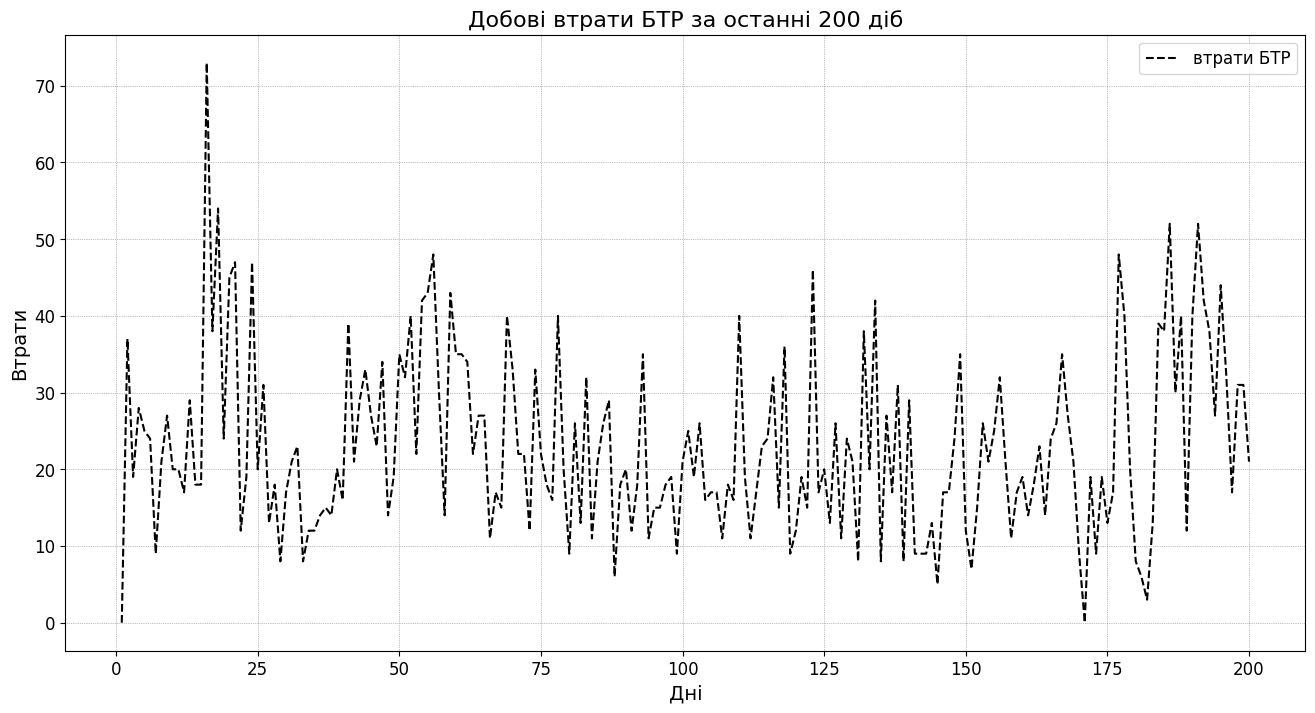

In [25]:

last_200_days = result_array[-200:].astype(int)
daily_losses = np.diff(last_200_days, prepend=last_200_days[0])

plt.figure(figsize=(16, 8), dpi=100)

plt.plot(range(1, 201), daily_losses, linestyle='dashed', color='black', label='втрати БТР')

plt.title("Добові втрати БТР за останні 200 діб", fontsize=16)
plt.xlabel("Дні", fontsize=14)
plt.ylabel("Втрати", fontsize=14)

plt.legend(loc='upper right', fontsize=12)
plt.grid(color='gray', linestyle='dotted', linewidth=0.5)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()
